# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

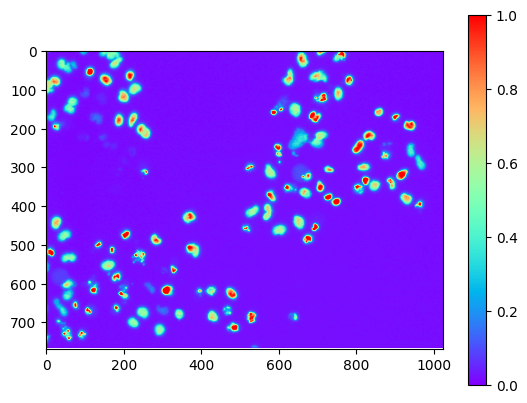

In [10]:
import numpy
import matplotlib.pyplot as plt



---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

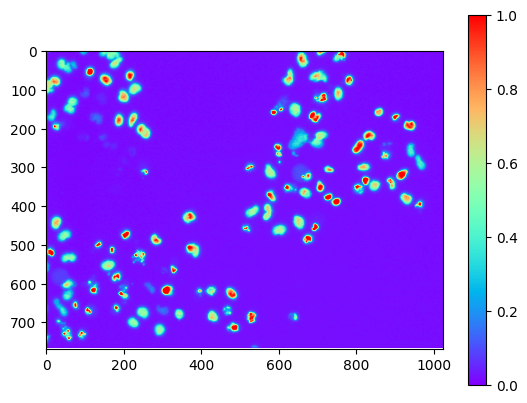

In [58]:
img = plt.imread("data/cells.png")
plt.figure()
plt.imshow(img, "rainbow")
plt.colorbar()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

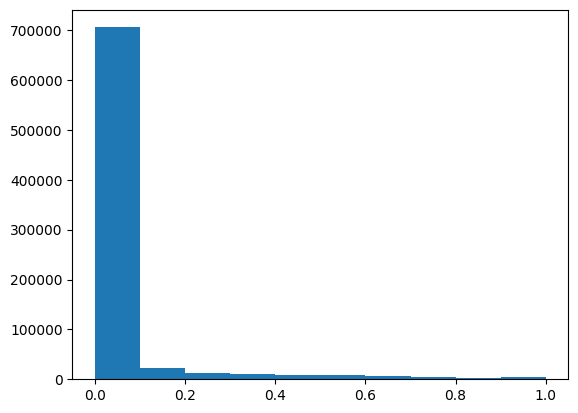

In [15]:
data = img.flatten()
plt.hist(data)

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [20]:
T1 = 0.31
T2 = 0.59



768

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

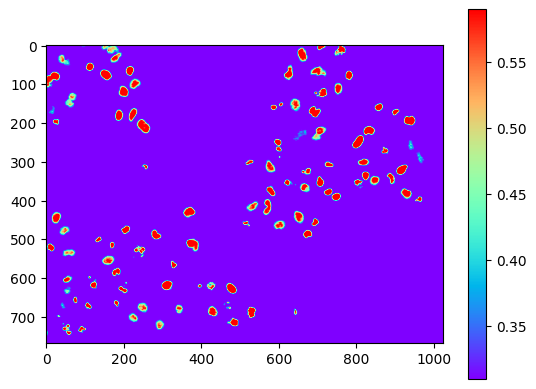

In [26]:
img2 = img.clip(T1, T2)
plt.imshow(img2, "rainbow")
plt.colorbar()

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

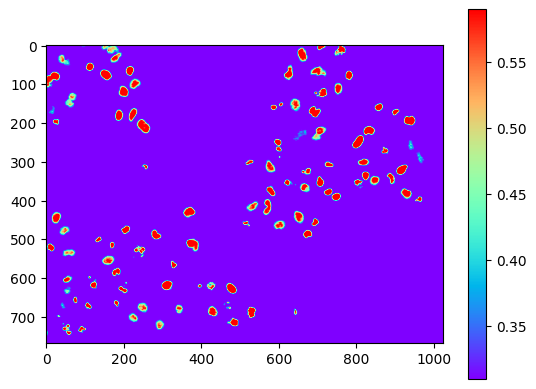

In [31]:
nrows = img.shape[0]
ncols = img.shape[1]

for i in range(0, nrows):
    for j in range (0, ncols):
        inten = img[i,j]
        if inten < T1:
            inten = T1
            img[i,j]=inten
        elif inten > T2:
            inten = T2
            img[i,j]=inten
        
plt.imshow(img, "rainbow")
plt.colorbar()


**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

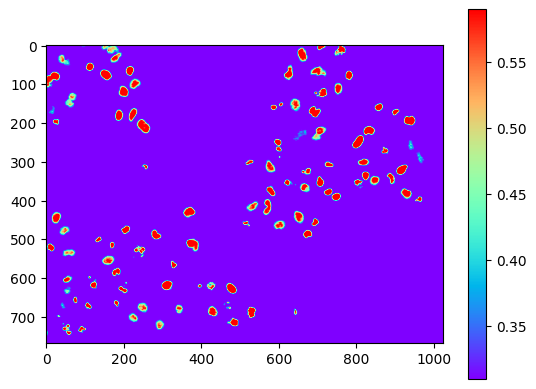

In [38]:
numpy.ndindex(img.shape)

for position in numpy.ndindex(img.shape):
    inten = img[position]
    if inten < T1:
        inten = T1
        img[position]=inten
    elif inten > T2:
        inten = T2
        img[position]=inten


plt.imshow(img, "rainbow")
plt.colorbar()    

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [59]:
def clip_image(img, T1, T2):
    results = img.copy()
    for position in numpy.ndindex(img.shape):
        inten = img[position]
        if inten < T1:
            results[position]=T1
        elif inten > T2:
            results[position]=T2
    return results

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [53]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

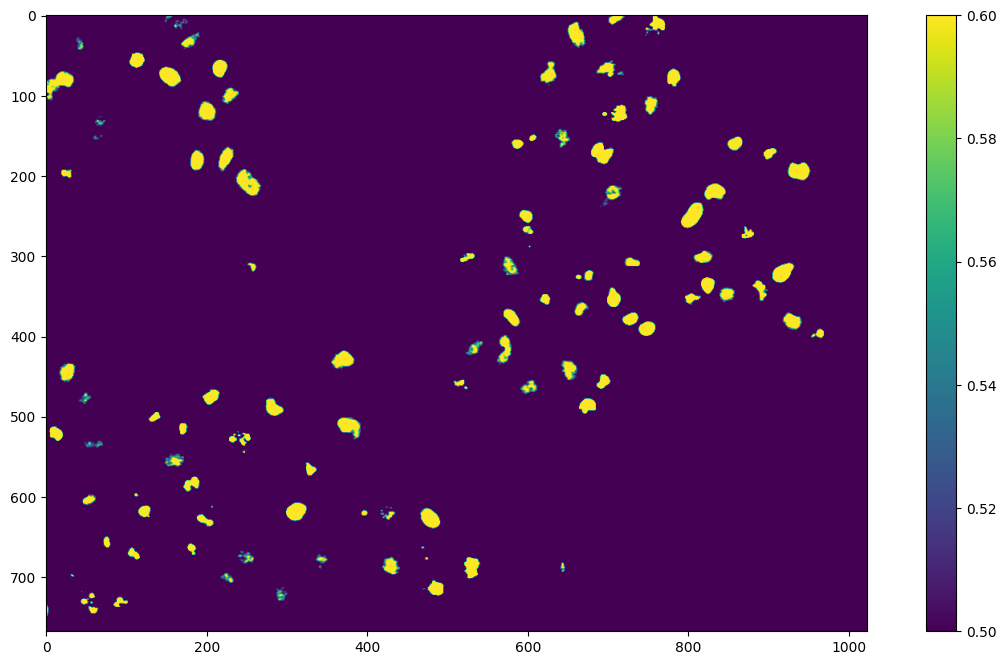

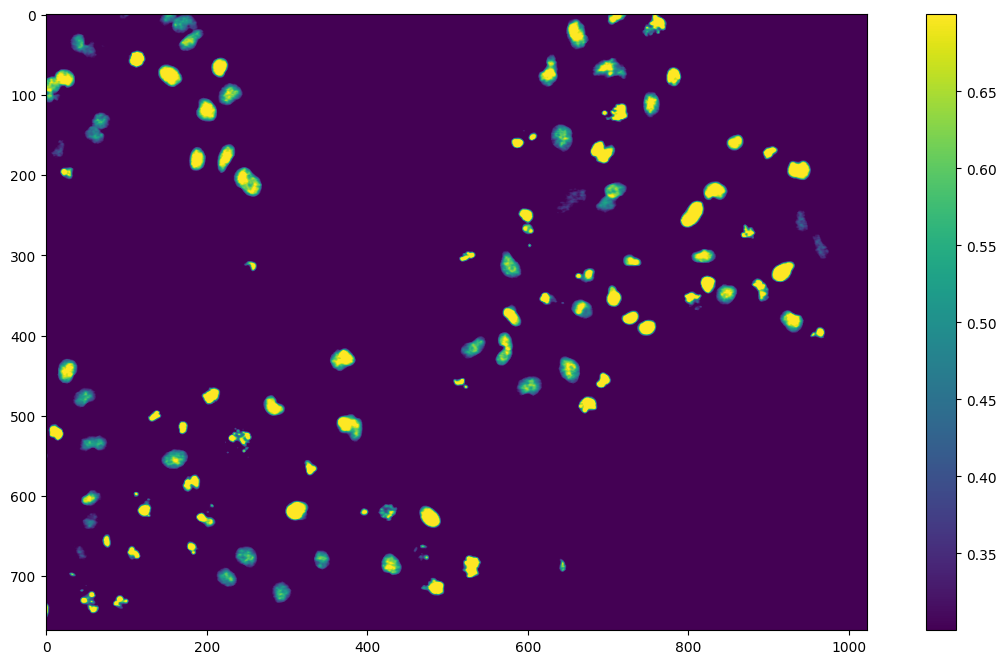

In [60]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.5, 0.6))
plt.colorbar()


plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))
plt.colorbar()

# here goes your code